## Probability & Statistics

###　代表値・統計量
データ分析において、最初に確認すべき量
* 平均値（mean）：　データの合計をデータ数で割ったもの
* 中央値(median)：　 データを大きさ順に並べて中央に位置するデータ値
* 分散：　対象のデータが平均からどれだけばらつきがあるか。
* 標準偏差：　分散の平方根

#### 平均値・中央値・標準偏差の計算

In [12]:
import numpy as np

# 外れ値なし
x = [3, 4, 5, 3, 4, 5, 3, 4, 5]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))
# 外れ値あり
x = [3, 4, 5, 3, 4, 5, 3, 4, 5, 100]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))

外れ値なしの数値のリスト
平均値： 4.0
中央値： 4.0
標準偏差 0.816496580927726
外れ値なしの数値のリスト
平均値： 13.6
中央値： 4.0
標準偏差 28.810414783546594


#### 売り上げ金額と気温の散布図

MEMO 大小関係がない値をカテゴリ変数と呼ぶ

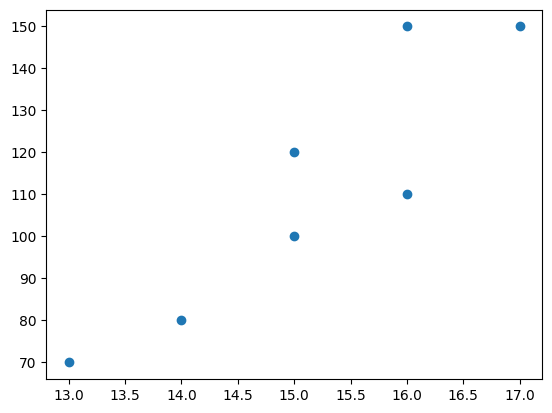

In [13]:
import matplotlib.pyplot as plt

# 気温と売り上げの一週間分の記録を保持したリスト
pair_list = [(15, 120), (14, 80), (17, 150), (16, 150), (16, 110), (15, 100), (13, 70)]

# 売り上げ金額を縦軸、気温を横軸とした散布図（scatter plot）
plt.scatter([x for x, y in pair_list], [y for x, y in pair_list])

Memo 気温と売り上げ金額は比例関係にありそうということがわかる

#### 相関係数
$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

In [14]:
# 相関係数の計算
x_i = [x for x, y in pair_list]
y_i = [y for x, y in pair_list]
x_bar = np.mean(x_i)
y_bar = np.mean(y_i)
# 分子
numerator = np.sum([(x - x_bar) * (y - y_bar) for x, y in pair_list])
# 分母
denominator1 = np.sqrt(np.sum([(x - x_bar) ** 2 for x in x_i]))

denominator2 = np.sqrt(np.sum([(y - y_bar) ** 2 for y in y_i]))

r_xy = numerator / (denominator1 * denominator2)
r_xy

0.9042001578168488

### 確率と確率分布

(array([ 999722., 1000527.,  999930.,  998707.,  998909.,  999502.,
        1000895., 1000223., 1000764., 1000821.]),
 array([2.09844806e-07, 1.00000170e-01, 2.00000130e-01, 3.00000090e-01,
        4.00000050e-01, 5.00000010e-01, 5.99999970e-01, 6.99999931e-01,
        7.99999891e-01, 8.99999851e-01, 9.99999811e-01]),
 <BarContainer object of 10 artists>)

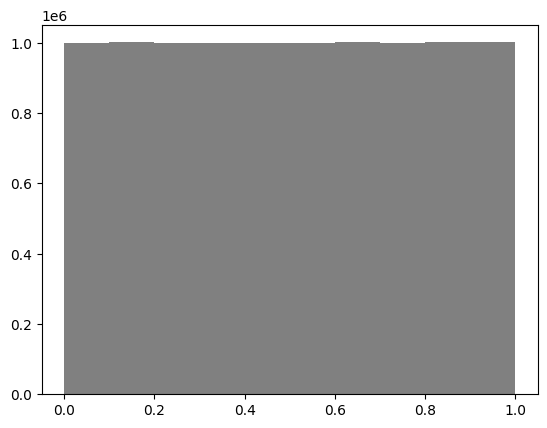

In [15]:
# 一様分布からの擬似乱数の発生
plt.hist(np.random.random(10000000), color="gray")

#### 確率変数
* 離散確率変数
    * ベルヌーイ分布
* 連続確率変数
    * 一様分布
    * 正規分布

(array([  9.,  34.,  90., 162., 220., 229., 176.,  63.,  13.,   4.]),
 array([453. , 462.8, 472.6, 482.4, 492.2, 502. , 511.8, 521.6, 531.4,
        541.2, 551. ]),
 <BarContainer object of 10 artists>)

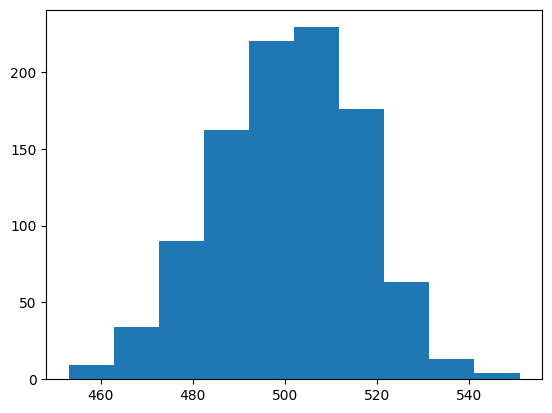

In [16]:
# コインで表が出る数の分布
all_sum = list()
n = 1000  # 　試行回数

for _ in range(1000):
    sum_ = 0
    for _ in range(n):
        sum_ += (
            np.random.random() > 0.5
        )  # 一様乱数を閾値(p:0.5)で切って「離散化」することでベルヌーイ試行を実現している
    all_sum.append(sum_)
plt.hist(all_sum)

(array([576., 267.,  89.,  38.,  18.,   6.,   3.,   1.,   0.,   1.]),
 array([1.0000e+00, 8.9630e+02, 1.7916e+03, 2.6869e+03, 3.5822e+03,
        4.4775e+03, 5.3728e+03, 6.2681e+03, 7.1634e+03, 8.0587e+03,
        8.9540e+03]),
 <BarContainer object of 10 artists>)

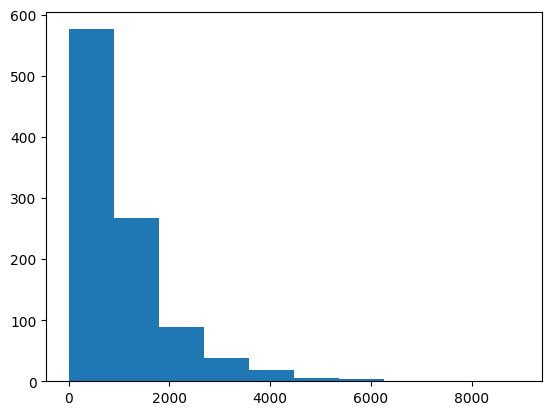

In [17]:
# 毎回確率が0.001で当たるクジを最大10000回引く時、何回目で当たりを引くかの分布
all_sum = list()
for _ in range(1000):
    for i in range(10000):
        if np.random.random() < 0.001:
            all_sum.append(i)
            break

plt.hist(all_sum)

(array([  3.,  17.,  57., 151., 231., 240., 175.,  87.,  31.,   8.]),
 array([-3.28750853, -2.66228191, -2.03705529, -1.41182868, -0.78660206,
        -0.16137544,  0.46385118,  1.0890778 ,  1.71430442,  2.33953103,
         2.96475765]),
 <BarContainer object of 10 artists>)

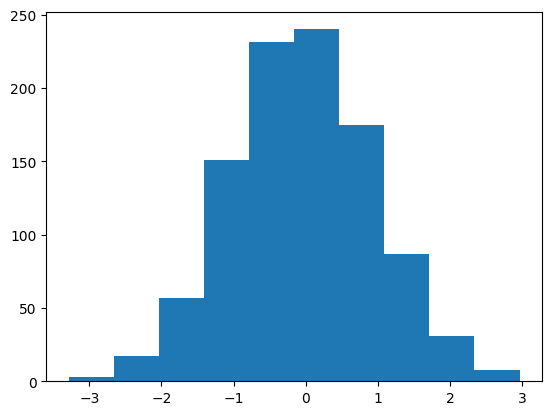

In [18]:
# 正規分布　平均値を中心に左右対称になる（物理的な世界でよく現れる分布らしい）
plt.hist(
    np.random.normal(size=1000)
)  # 標準正規分布に従う乱数を指定された数（この場合は1000個）生成

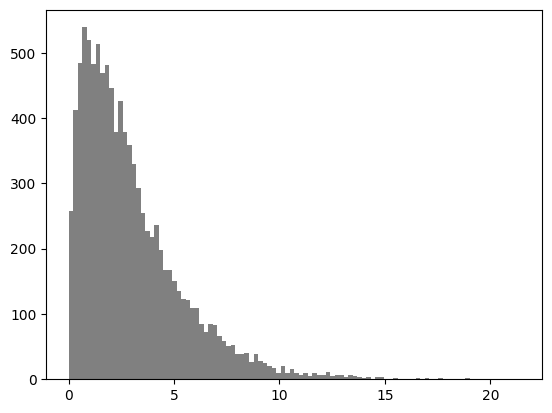

In [19]:
""" カイ二乗分布に従うサンプルのヒストグラム
正規分布に従う確率変数を２乗したものをk個足しわせたものをカイ二乗分布という。
"""

N = 10000
plt.hist(
    np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2,
    bins=100,  # ヒストグラムの棒の数
    color="gray",
)

plt.show()

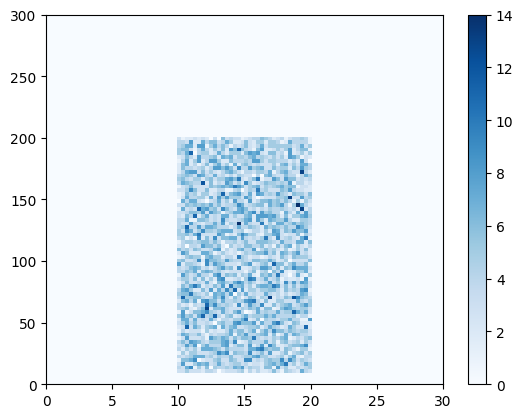

In [20]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(10から20までの数値をランダムに含む、長さ10000の配列を生成)
x = np.random.uniform(low=10, high=20, size=10000)
# 売上金額(10から200までの数値をランダムに含む、長さ10000の配列を生成)
y = np.random.uniform(10, 200, size=10000)

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Blues")

plt.colorbar()

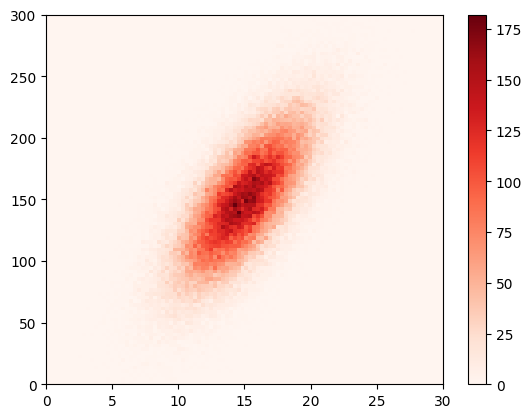

In [21]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(平均が15で標準偏差が3の正規分布からランダムに抽出された100,000個の数値を含む配列)
x = np.random.normal(loc=15, scale=3, size=100000)
# 　誤差項
e = np.random.normal(loc=0, scale=30, size=100000)
# 売上金額
"""
気温と売上金額の間の線形関係を定義。
気温xに対する売上金額yの関係は、気温が1℃上昇するごとに売上が10単位増加すると仮定。
加えて、e（誤差項）によって、この線形関係にバリエーション（ばらつき）を加えることで
実際のデータにより近い形のシミュレーションをしている
"""
y = 10 * x + e

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Reds")

plt.colorbar()

<Axes: >

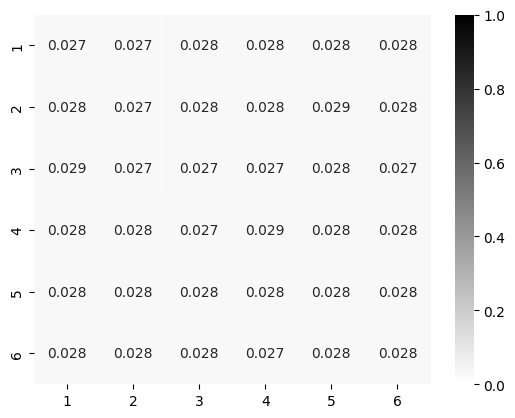

In [27]:
# 二つの独立なサイコロを投げた時の結果
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]

x = np.random.choice(dice, size=100000)
y = np.random.choice(dice, size=100000)

hist, _, _ = np.histogram2d(x, y, bins=len(dice), range=[[1, 6], [1, 6]])

sns.heatmap(
    hist / 100000,
    annot=True,
    xticklabels=dice,
    yticklabels=dice,
    vmax=1,
    vmin=0,
    cmap="gray_r",
)

Text(50.722222222222214, 0.5, 'n')

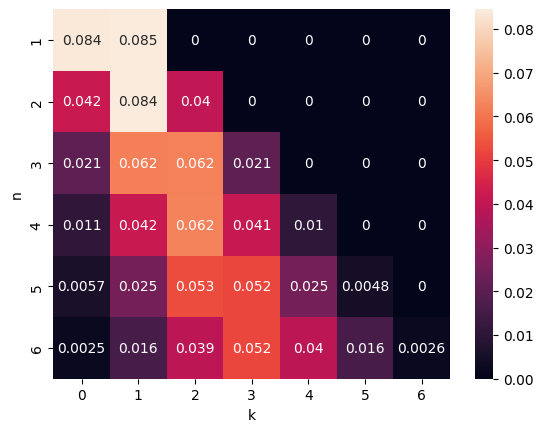

In [31]:
# 非独立な２つの離散確率変数からのサンプル
""" サイコロを振ってでた目をXとして、
そのX回だけ、コインを投げて面が出た数をYとした時の
結合確率分布を表示する
"""
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]

x = np.random.choice(dice, size=100000)
y = []

for trial_x in x:
    trial_y = sum([np.random.choice([0, 1]) for _ in range(trial_x)])
    y.append(trial_y)


hist, _, _ = np.histogram2d(x, y, bins=(len(dice),len(dice)+1), range=[[1, 6], [0, 6]])

sns.heatmap(
    hist / 100000,
    annot=True,
    xticklabels=[0]+dice,
    yticklabels=dice,

)

plt.xlabel("k")
plt.ylabel("n")